**Group name:** HER; **Group member:** Chining Liu, Pojen Hsieh, Juijia Chen

**1. Dataset Description:** The dataset comprises financial data obtained from Yahoo Finance for five travel-related stocks: ABNB (Airbnb), BKNG (Booking Holdings), EXPE (Expedia Group), CCL (Carnival Corporation), and RCL (Royal Caribbean Group).The temporal scope of the dataset spans from **January 1, 2021, to December 30, 2021**. This chosen timeframe enables an examination of the impact of the COVID-19 pandemic on the travel industry.  

**2. Functionality:**

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t, chi2
from sklearn.linear_model import LinearRegression
from datetime import date

In [202]:
symbols = ['ABNB', 'BKNG', 'EXPE', 'CCL', 'RCL']
data = {symbol: pd.read_csv(f'data/{symbol}.csv') for symbol in symbols}

In [203]:
stocks = {'ABNB': ABNB, 'BKNG': BKNG, 'EXPE': EXPE, 'CCL': CCL, 'RCL': RCL}
for symbol, df in stocks.items():
    df['log-return'] = np.log(df['Close'] / df['Open'])
    df['Symbol'] = symbol

**2.1 Function1: Display histograms for log-returns by stock symbol**


In [231]:
def plot_histogram(stock_name):
    plt.figure(figsize=(2.3, 2.3))
    plt.hist(stock_name['log-return'], bins=20, color='lightblue', alpha=0.7)
    plt.title(f"Histogram of Log-Returns for {stock_name['Symbol'][0]} Stock")
    plt.xlabel('Log-Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

We can draw the histogram of log-returns of "ABNB" by calling:


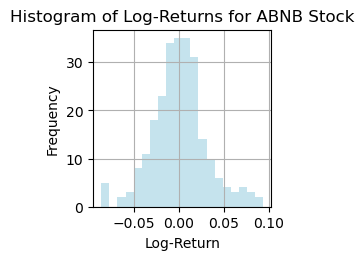

In [232]:
plot_histogram(ABNB) 

The histogram shows the frequency distribution of the log returns for the stock(ABNB). It is roughly bell-shaped and centered around zero, which is typical for log returns of a stock over short periods. As for the volatility of the stock's returns, it shows a moderate range, suggesting a moderate level of volatility. 

**2.2 Function2: Display a normal probability plot to see if the data is approximately normal.**

In [239]:
def normal_probability(stock_name):
    plt.figure(figsize=(2.3, 2.3))
    stock_name['log-return'] = np.log(stock_name['Close'] / stock_name['Open'])
    stats.probplot(stock_name['log-return'], dist="norm", plot=plt)
    plt.title(f"Normal Probability Plot for {stock_name['Symbol'][0]} Log-Returns")
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()

We can draw the normal probability plot of "CCL" by calling:

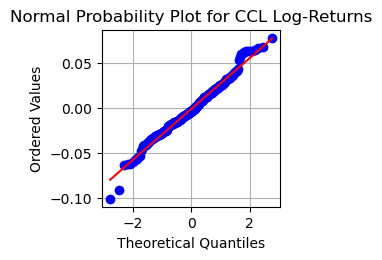

In [240]:
normal_probability(CCL)  

In the normal probability plot, the data points (blue dots) are plotted against the theoretical quantiles (expected values if the data were normally distributed). The red line represents the fit that would be expected if the data were perfectly normally distributed. For CCL stock, most of the data points follow the line closely, indicating that the log returns are approximately normally distributed. There are some deviations from the line, particularly at the tails (the ends) of the distribution. This indicates that there may be more extreme values (outliers) than what would be expected in a normal distribution. It suggests that the stock may have periods of higher than expected volatility, which could impact risk management strategies.


**2.3 Function3: Create (approximate) confidence intervals for the means and variances given a confidence level.** 

In [228]:
def ConfidenceInterval(stock, confidence):
  n = len(stock)
  m = np.mean(stock)
  s_squared = np.var(stock)
  h = (np.sqrt(s_squared/n)) * t.ppf((1 + confidence) / 2, n-1)
  lower_bound = (n-1) * s_squared / chi2.ppf(1 - (1 - confidence) / 2, n-1)
  upper_bound = (n-1) * s_squared / chi2.ppf((1 - confidence) / 2, n-1)
  mean_interval = [m - h, m + h]
  variance_interval = [lower_bound, upper_bound]
  print("Confidence intervals for the mean: ", mean_interval)
  print("Confidence intervals for the variance: ", variance_interval)

We can get the mean and the variance confidence interval of BKNG's log-return by calling:

In [226]:
 ConfidenceInterval(BKNG['log-return'], confidence = 0.95)

Confidence intervals for the mean:  [-0.0032864003988007495, 0.0011658043091518104]
Confidence intervals for the variance:  [0.00027111784495862593, 0.0003852345597368875]


**The mean confidence interval** provides a range of values within which we are confident the true mean log-return of the stock lies. For example, given stock BKNG at a 95% confidence level. We are 95% confident that the true variance of log-return values falls within the range of approximately -0.0032864 to 0.0011658. **The variance confidence interval** provides a range of values within which we are confident the true variance of log-return values lies. Similarily, with a 95% confidence level, you can say that 95% confident that the true variance of log-return values falls within the range of approximately 0.0002711 to 0.000385. A narrower interval indicates higher confidence in the estimate of variance.



 **2.4 Function4: Perform a regression of the log-return on time**
 

In [264]:
def OneStockRegression(stock):
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['ordinal'] = stock['Date'].map(pd.Timestamp.toordinal)
    y = np.log(stock['Close'] / stock['Open'])
    model = LinearRegression().fit(stock[['ordinal']], y)
    print("slope is:" + str(model.coef_[0])+", intercept is:"+str(model.intercept_))
    y_pred = model.predict(stock[['ordinal']])
    plt.figure(figsize=(6, 2))
    plt.scatter(stock['Date'], y, color='blue', label='Data Points', s=8)
    plt.plot(stock['Date'], y_pred, color='red', label='Regression Line')
    plt.vlines(stock['Date'], y_pred, y, color='gray', linestyle='dotted', linewidth=0.8, label='Residuals')
    plt.title('Regression of Log-Return on Date')
    plt.xlabel('Date')
    plt.ylabel('Log-Return')
    plt.legend(fontsize=6)
    plt.annotate(f"R-squared: {model.score(stock[['ordinal']], y):.8f}", xy=(0.65, 0.9), xycoords='axes fraction')
    plt.show()

We can perform a regression of "BKNG"'s log-return on time by calling:

slope is:6.138017225066759e-06, intercept is:-4.530757226062225


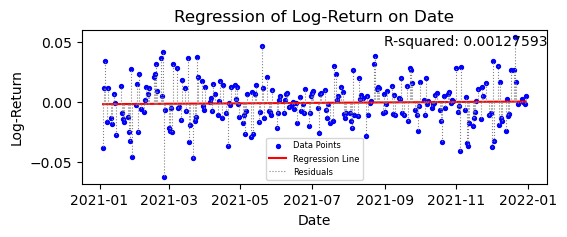

In [265]:
OneStockRegression(BKNG)

**The Slope (Time Trend)** of the date variable indicates a statistical increasing/decreasing trend in log-return of stocks during the COVID-19 period. This trend reflect the impact of the pandemic on stock returns. **The Intercept (Starting Point)** represents the estimated average log-return at the start of the COVID-19 period (January 2021), setting the baseline for subsequent trends. **The Residuals (Unexplained Variation)** helps identify periods where the model deviates from observed log-return values. **The R-squared (Model Fit)** tells the proportion of log-return variability during the pandemic period explained by the date. 

Given the dataset of BKNG, we found that a small slope indicates that the relationship between time and log-return is very weak. Besides, a low R-squared suggests that date time does not strongly explain the variation in log-return. 

**2.5 Function5: Test the equality of the two population means of two stock symbols**


In [251]:
def ttest(stock1, stock2):
    stock1 = stock1[stock1.columns.drop('Date').drop('Symbol')]
    stock2 = stock2[stock2.columns.drop('Date').drop('Symbol')]
    ttest_result = stats.ttest_ind(stock1,stock2)
    ttest_df = pd.DataFrame({'Column': stock1.columns,'T-Statistic': ttest_result.statistic, 'P-Value': ttest_result.pvalue})
    ttest_df = ttest_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print("Testing the equality of the two population means.")
    print("T-test result")
    print(ttest_df)

We can test the equality of population means of "ABNB" and "CCL" by calling:

In [213]:
ttest(ABNB, CCL)

Testing the equality of the two population means.
T-test result
       Column T-Statistic   P-Value
0        Open  111.535649  0.000000
1        High  108.524941  0.000000
2         Low  115.069695  0.000000
3       Close  112.752201  0.000000
4   Adj Close  112.752201  0.000000
5      Volume  -27.363584  0.000000
6  log-return    0.653450  0.513766


**'Log-return'** is the only variable that, under a significance level of 0.05, we find no significant evidence to reject the null hypothesis. That is, we can not reject the null hypothesis that says the population mean of the two stock symbols' log return is the same. Results for **all the other variables** ('Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'), however, allow us to reject the null hypotheses under a significance level of 0.05. **In conclusion**, we can neither say "on average, ABNB's log return is higher/lower than that of CCL" nor can we say "on average, 'Open', 'High', 'Low', 'Close', 'Adj Close', or 'Volume' of ABNB and CCL is the same."  

**2.6 Function6: Perform a regression of one stock symbol's log-return on the other's**

In [262]:
def regression_logreturn(x_stock, y_stock):
    X = x_stock['log-return'].values.reshape(-1, 1)
    y = y_stock['log-return']
    model = LinearRegression().fit(X, y)
    print("slope is:" + str(model.coef_[0])+", intercept is:"+str(model.intercept_))
    y_pred = model.predict(X)
    plt.figure(figsize=(6, 2))
    plt.scatter(X, y, color='blue', label='Data Points', s=8)
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.vlines(X.flatten(), y_pred, y, colors='green', linestyles='dotted', label='Residuals')
    plt.title(f'Regression: {x_stock["Symbol"][0]} vs {y_stock["Symbol"][0]} (R^2={model.score(X, y):.3f})')
    plt.xlabel(f'{x_stock["Symbol"][0]} Log-Return')
    plt.ylabel(f'{y_stock["Symbol"][0]} Log-Return')
    plt.legend(fontsize=6)
    plt.show()

We can perform a regression of "CCL"'s log-return on "ABNB"'s log-return by calling:

slope is:0.3843822560261787, intercept is:-0.0014941638363147446


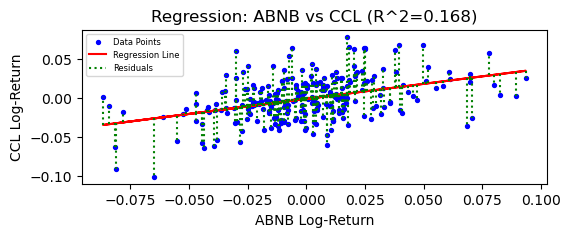

In [263]:
regression_logreturn(ABNB, CCL)

**The slope** is a positive value, indicating the average change in 'CCL log-return' for a one-unit change in 'ABNB log-return' is in the same direction (ie. they are positively correlated). **The R-squared value** of approximately 0.168 suggests that around 16.8% of the variability in 'CCL log-return' can be explained by 'ABNB log-return'. In other words,  'ABNB log-return' only explains a small portion of the variation in 'CCL log-return', and there might be other factors at play that are not included in the model. **In conclusion**, on average, when "ABNB log-return" increases/decreases, so does "CCL log return." But to better explain the variation of "CCL log return", incorporating more factors besides 'ABNB log-return' into the model may be necessary.

**3. Reference:**


https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

https://scikit-learn.org/stable/modules/linear_model.html
